In [802]:
import seaborn as sns
import os
import numpy as np
import matplotlib.pyplot as plt
import imageio

## Figure 9.16

matlab code:

In [86]:
# 1 %% TD learning
# 2 clear; clf; hold on;
# 3 gamma=0.8; reward=[0 1 0 0.5 0]; pattern_vector=rand(10,5);
# 4 w=rand(1,10); V_mem=0; previous_state=5;
# 5
# 6 for episode=1:100; TDerror(episode)=0;
# 7 for pattern=1:5
# 8 V=w*pattern_vector(:,pattern);
# 9 rhat=reward(previous_state)+gamma*V-V_mem;
# 10 w=w+0.2*rhat*pattern_vector(:,previous_state)’;
# 11 TDerror(episode)=TDerror(episode)+abs(rhat);
# 12 previous_state=pattern; V_mem=V;
# 13 end
# 14 end
# 15
# 16 subplot(2,1,1);
# 17 plot(TDerror);xlabel(’Episode’); ylabel(’TD error’)
# 18 subplot(2,1,2);
# 19 plot(w*pattern_vector);xlabel(’Pattern’); ylabel(’V(Pattern)’)

code:

In [147]:
gamma = 0.8 
# reward = np.array([0, 1, 0, 0.5, 0])
reward = np.array([0, 0, 1, 0, 0])
n_patterns = len(reward)
pattern_len = 10
pattern_vector = np.random.rand(pattern_len, n_patterns)
w = np.random.rand(pattern_len)
V_mem = 0 
previous_state = n_patterns-1
lr = 0.2
n_episodes = 100
TDerror = np.zeros(n_episodes)

In [148]:
for episode in range(n_episodes): 
    for pattern in range(5):
        V = w @ pattern_vector[:, pattern]
        rhat = reward[previous_state] + gamma*V - V_mem
        w += lr * rhat * pattern_vector[:, previous_state].T
        TDerror[episode] += abs(rhat);
        previous_state = pattern 
        V_mem = V

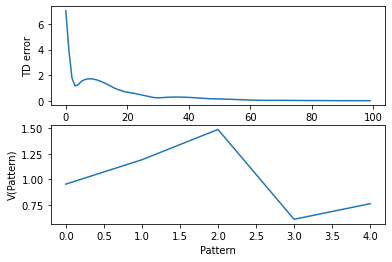

In [150]:
plt.subplot(2,1,1)
plt.plot(TDerror);
plt.xlabel('Episode')
plt.ylabel('TD error')
plt.subplot(2,1,2);
plt.plot(w @ pattern_vector)
plt.xlabel('Pattern') 
plt.ylabel('V(Pattern)');

In [151]:
w @ pattern_vector

array([0.95209109, 1.19053281, 1.48702578, 0.60804369, 0.76089274])

In [152]:
def circular_dist(x,y,n): 
    return (y-x)%n

def correct_v(pattern): 
    dists = np.array([circular_dist(pattern, i, n_patterns) for i in range(n_patterns)])
    return sum(reward * gamma**dists) / (1-gamma**n_patterns)

np.array([correct_v(pattern) for pattern in range(n_patterns)])

array([0.95192765, 1.18990957, 1.48738696, 0.6092337 , 0.76154212])

## figure 9.20

matlab code:

In [92]:
# 1 %% TD learning
# 2 clear; clf; hold on;
# 3 gamma=0.8; reward=[0 0 1 0 0]; pattern_vector=zeros(10,5);
# 4 pattern_vector(:,3)=[1;0;0;0;0;0;0;0;0;0];
# 5 w=zeros(1,10); V_mem=0; previous_state=5;
# 6
# 7 for episode=1:100; TDerror(episode)=0;
# 8 if episode==50; pattern_vector(:,2)=[0;0;0;1;0;0;0;0;0;0]; end;
# 9 for pattern=1:5
# 10 V=w*pattern_vector(:,pattern);
# 11 rhat(episode,pattern)=reward(previous_state)+gamma*V-V_mem;
# 12 w=w+0.2*rhat(episode,pattern)*pattern_vector(:,previous_state)’;
# 13 TDerror(episode)=TDerror(episode)+abs(rhat(episode,pattern));
# 14 previous_state=pattern; V_mem=V;
# 15 end
# 16 end
# 17
# 18 plot(rhat); xlabel(’Episode’); ylabel(’rhat’);

code:

In [193]:
gamma = 0.8 
# reward = np.array([0, 1, 0, 0.5, 0])
reward = np.array([0, 0, 1, 0, 0])
n_patterns = len(reward)
pattern_len = 10
pattern_vector = np.zeros([pattern_len, n_patterns])
pattern_vector[0,2] = 1
# pattern_vector = np.random.rand(pattern_len, n_patterns)

w = np.zeros(pattern_len)
V_mem = 0 
previous_state = n_patterns-1
lr = 0.2
n_episodes = 100
TDerror = np.zeros(n_episodes)
rhat = np.zeros([n_episodes, n_patterns])

In [194]:
for episode in range(n_episodes): 
#     if episode == 50:
#         pattern_vector[3,1] = 1
    for pattern in range(5):
        V = w @ pattern_vector[:, pattern]
        rhat[episode, pattern] = reward[previous_state] + gamma*V - V_mem
        w += lr * rhat[episode, pattern] * pattern_vector[:, previous_state].T
        TDerror[episode] += abs(rhat[episode, pattern]);
        previous_state = pattern 
        V_mem = V

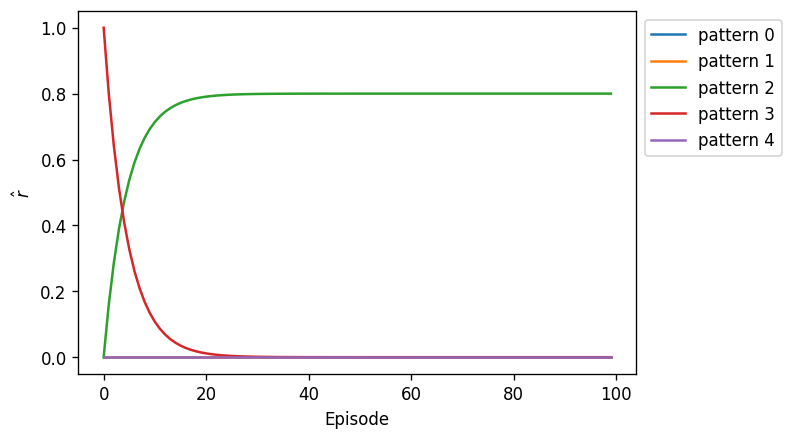

In [195]:
plt.figure(dpi=120)
plt.plot(rhat)
plt.xlabel('Episode')
plt.ylabel('$\hat{r}$')
plt.legend([f'pattern {pattern}' for pattern in range(n_patterns)],
          bbox_to_anchor=(1,1));

Text(0, 0.5, 'V(Pattern)')

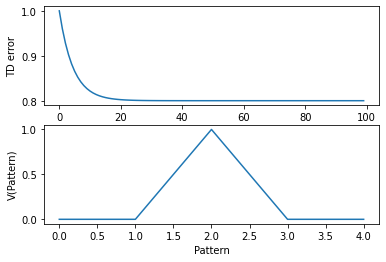

In [196]:
plt.subplot(2,1,1)
plt.plot(TDerror);
plt.xlabel('Episode')
plt.ylabel('TD error')
plt.subplot(2,1,2);
plt.plot(w @ pattern_vector)
plt.xlabel('Pattern') 
plt.ylabel('V(Pattern)')

In [200]:
w, pattern_vector, w @ pattern_vector

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([[0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]),
 array([0., 0., 1., 0., 0.]))

In [199]:
def circular_dist(x,y,n): 
    return (y-x)%n

def correct_v(pattern): 
    dists = np.array([circular_dist(pattern, i, n_patterns) for i in range(n_patterns)])
    return sum(reward * gamma**dists) / (1-gamma**n_patterns)

np.array([correct_v(pattern) for pattern in range(n_patterns)])

array([0.95192765, 1.18990957, 1.48738696, 0.6092337 , 0.76154212])

Figure 3

In [ ]:
% TD_learning

clear; close all; clc

N_trials = 700;
t_final = 220;
w = zeros(1,t_final);
eta = 0.2;
v = zeros(1,t_final);
% v_next = = zeros(1,t_final);
figure('Color','w')
fs = 16; % FontSize

for n = 1:N_trials
    % stimulus
    u = zeros(1,t_final);
%     k = ceil(rand*100);
    k = 100;
    u(k) = 1;
    u(k-20) = 1;
    
    % reward
    r = zeros(1,t_final);
    r(k+100) = 2;

%     fprintf('n=%d\n', n)
    for t = 2:(t_final-1)
        % calculate v(t)
        % w(tau) is the w for u(t-tau), i.e. for the stimulus that appeared
        % tau time steps earlier.
        v(t) = w(1:t-1)*u(t-1:-1:1)';

        % calculate v_next(t)
        v_next(t) = w(1:t)*u(t:-1:1)';

        delta(t) = r(t) + v_next(t) - v(t);
%         if delta(t)>0
%             fprintf('t=%d, r=%d, v_next=%d, v=%d, delta=%d\n',t, r(t),v_next(t), v(t),delta(t))
%         end

        tau = 1;
        while t-tau>0
            w(tau)  = w(tau) + eta*delta(t)*u(t-tau);
            tau = tau +1;
        end
    end

    if rem(n,5)==0
        subplot(3,2,1);
        plot(u);
        set(gca,'FontSize',fs,'XLim',[0 220],'YLim',[0 1.1]);
        ylabel('u');title(['Trial #' num2str(n)]);
        subplot(3,2,2);plot(r);
        set(gca,'FontSize',fs,'XLim',[0 220]);
        ylabel('r')
        subplot(3,2,3);plot(v);
        set(gca,'FontSize',fs,'XLim',[0 220]);
        ylabel('v')
        subplot(3,2,4);plot(v_next-v(1:(length(v)-1) ) );
        set(gca,'FontSize',fs,'XLim',[0 220]);
        ylabel('\Deltav')
        subplot(3,2,5);plot(delta);
        set(gca,'FontSize',fs,'XLim',[0 220]);
        ylabel('\delta')
        xlabel('Time')
        subplot(3,2,6)
        plot(w)
        set(gca,'FontSize',fs,'XLim',[0 220],'YLim',[0 10.1]);
        ylabel('w')
        xlabel('\tau')
        drawnow;
    end

end

In [325]:
# for trial in range(n_trials):
#     for t in range(1,t_final-1):
#         # calculate v(t)
#         # w(tau) is the w for u(t-tau), i.e. for the stimulus that appeared
#         # tau time steps earlier.
#         v[trial, t] = w1[:t] @ u1[t-1::-1] #+ w2[:t] @ u2[t-1::-1]
#         v_next[trial, t] = w1[:t+1] @ u1[t::-1] #+ w2[:t+1] @ u2[t::-1]
#         delta[trial, t] = r[t] + v_next[trial, t] - v[trial, t]
# #         if delta(t)>0
# #             fprintf('t=#d, r=#d, v_next=#d, v=#d, delta=#d\n',t, r(t),v_next(t), v(t),delta(t))
# #         end
#         for tau in range(t):
#             w1[tau] += lr * delta[trial, t] * u1[t-tau]
#             #w2[tau] += lr * delta[trial, t] * u2[t-tau]

# Schultz 1997

### introduction

In [895]:
n_trials = 200
t_final = 60
lr = 0.2
gamma = 1
v = np.zeros((n_trials, t_final))
v_next = np.zeros((n_trials, t_final))
delta = np.zeros((n_trials, t_final))

# stimulus 1
u1 = np.zeros(t_final)
u1[10] = 1;
w1 = np.zeros(t_final)

# stimulus 2
u2 = np.zeros(t_final)
u2[20] = 1
w2 = np.zeros(t_final)

# reward
r = np.zeros(t_final)
r[-2] = 1

# learning:
for trial in range(n_trials):
    # run trial
    for t in range(1,t_final-1):

        #### v3 ####
        # calculate v(t)
        tau = 0
        while t-tau>0:
            v[trial, t] += w1[tau]*u1[t-tau] + w2[tau]*u2[t-tau]
            tau +=1

        # calculate v_next(t)
        tau = 0
        while t+1-tau>0:
            v_next[trial, t] += w1[tau]*u1[t+1-tau] +  w2[tau]*u2[t+1-tau]
            tau += 1
            
    
        delta[trial, t] = r[t] + gamma*v_next[trial, t] - v[trial, t]

    # update weights
        tau = 0
        while t-tau>0:
            w1[tau] += lr*delta[trial, t]*u1[t-tau];
            w2[tau] += lr*delta[trial, t]*u2[t-tau];
            tau += 1;


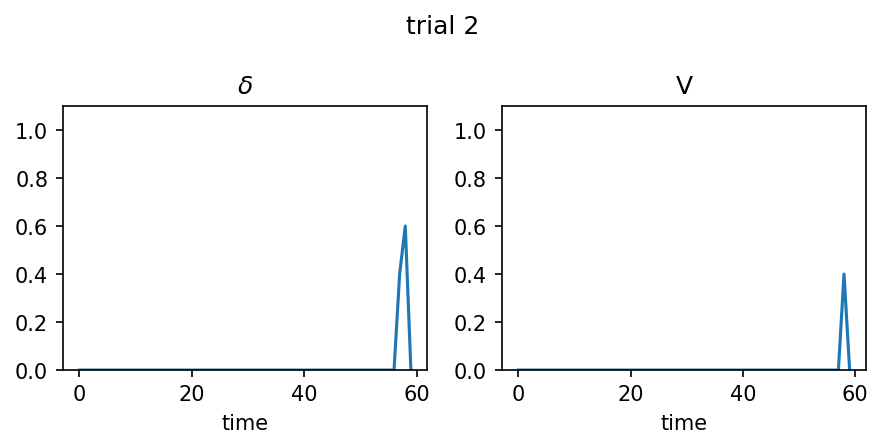

In [894]:
filenames = []
plt.figure(dpi=150, figsize = (6,3))
maxdelta = np.max(delta)*1.1
maxv = np.max(v)*1.1
RANGE = np.hstack([np.arange(10), np.arange(10,n_trials-10,step=5), np.arange(n_trials-10, n_trials)])
trial =1    
plt.subplot(1,2,1)
plt.plot(delta[trial])
plt.ylim([0, maxdelta])
plt.xlabel('time')
plt.title('$\delta$')
plt.subplot(1,2,2)
plt.plot(v[trial])
plt.ylim([0, maxv])
plt.xlabel('time')
plt.title('V')
plt.suptitle(f'trial {trial+1}')
plt.tight_layout()

In [896]:
filenames = []
plt.figure(dpi=150, figsize = (6,3))
maxdelta = np.max(delta)*1.1
maxv = np.max(v)*1.1
RANGE = np.hstack([np.arange(10), np.arange(10,n_trials-10,step=5), np.arange(n_trials-10, n_trials)])
for trial in RANGE:
    
    plt.subplot(1,2,1)
    plt.plot(delta[trial])
    plt.ylim([0, maxdelta])
    plt.xlabel('time')
    plt.title('$\delta$')
    plt.subplot(1,2,2)
    plt.plot(v[trial])
    plt.ylim([0, maxv])
    plt.xlabel('time')
    plt.title('V')
    plt.suptitle(f'trial {trial+1}')
    plt.tight_layout()
     
    
    # create file name and append it to a list
    filename = f'project1-images-delta/delta{trial}.png'
    filenames.append(filename)
    
    # save frame
    plt.savefig(filename)
    plt.clf()
    
# build gif
with imageio.get_writer('delta.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

# Remove files
for filename in set(filenames):
    os.remove(filename);

/tmp/ipykernel_13078/1741596848.py:33: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


<Figure size 900x450 with 0 Axes>

### removing stimulus 2 in the middle

In [898]:
n_trials = 90
t_final = 60
lr = 0.2
gamma = 1
v = np.zeros((n_trials, t_final))
v_next = np.zeros((n_trials, t_final))
delta = np.zeros((n_trials, t_final))

# stimulus 1
u1 = np.zeros(t_final)
u1[10] = 1;
w1 = np.zeros(t_final)

# stimulus 2
u2 = np.zeros(t_final)
u2[20] = 1
w2 = np.zeros(t_final)

# reward
r = np.zeros(t_final)
r[-2] = 1

# learning:
for trial in range(n_trials):
    # run trial
    for t in range(1,t_final-1):

        #### v3 ####
        # calculate v(t)
        tau = 0
        while t-tau>0:
            v[trial, t] += w1[tau]*u1[t-tau] + w2[tau]*u2[t-tau]
            tau +=1

        # calculate v_next(t)
        tau = 0
        while t+1-tau>0:
            v_next[trial, t] += w1[tau]*u1[t+1-tau] +  w2[tau]*u2[t+1-tau]
            tau += 1
            
    
        delta[trial, t] = r[t] + gamma*v_next[trial, t] - v[trial, t]

    # update weights
        tau = 0
        while t-tau>0:
            w1[tau] += lr*delta[trial, t]*u1[t-tau];
            w2[tau] += lr*delta[trial, t]*u2[t-tau];
            tau += 1;


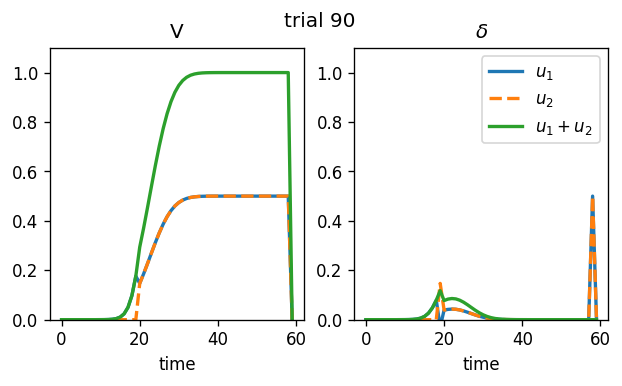

In [899]:
plt.figure(dpi=120, figsize=(6,3))

# only stimulus 1
vv = np.zeros(t_final)
vv_next = np.zeros(t_final)
deltaa = np.zeros(t_final)
for t in range(1,t_final-1):
    tau = 0
    while t-tau>0:
        vv[t] += w1[tau]*u1[t-tau] #+ w2[tau]*u2[t-tau]
        tau +=1

    tau = 0
    while t+1-tau>0:
        vv_next[t] += w1[tau]*u1[t+1-tau] #+ w2[tau]*u2[t+1-tau]
        tau += 1

    deltaa[t] = r[t] + gamma*vv_next[t] - vv[t]
    
plt.subplot(1,2,1)
plt.plot(vv, linewidth=2)
plt.subplot(1,2,2)
plt.plot(deltaa, linewidth=2)


# only stimulus 2
vv = np.zeros(t_final)
vv_next = np.zeros(t_final)
deltaa = np.zeros(t_final)
for t in range(1,t_final-1):
    tau = 0
    while t-tau>0:
        vv[t] +=  w2[tau]*u2[t-tau]
        tau +=1

    tau = 0
    while t+1-tau>0:
        vv_next[t] += w2[tau]*u2[t+1-tau]
        tau += 1

    deltaa[t] = r[t] + gamma*vv_next[t] - vv[t]
    
plt.subplot(1,2,1)
plt.plot(vv, '--', linewidth=2)
plt.subplot(1,2,2)
plt.plot(deltaa, '--', linewidth=2)

# both stimuli
vv = np.zeros(t_final)
vv_next = np.zeros(t_final)
deltaa = np.zeros(t_final)
for t in range(1,t_final-1):
    tau = 0
    while t-tau>0:
        vv[t] += w1[tau]*u1[t-tau] + w2[tau]*u2[t-tau]
        tau +=1
        
    tau = 0
    while t+1-tau>0:
        vv_next[t] += w1[tau]*u1[t+1-tau] + w2[tau]*u2[t+1-tau]
        tau += 1

    deltaa[t] = r[t] + gamma*vv_next[t] - vv[t]
    
plt.subplot(1,2,1)
plt.xlabel('time')
plt.plot(vv, linewidth=2)
plt.title('V')
plt.ylim([0, 1.1])
plt.subplot(1,2,2)
plt.ylim([0, 1.1])
plt.xlabel('time')
plt.plot(deltaa, linewidth=2)
plt.title('$\delta$')

plt.legend(('$u_1$', '$u_2$', '$u_1+u_2$'))
plt.suptitle(f'trial {n_trials}')
plt.xlabel('time');


### Figure 3 - paper

In [936]:
n_trials = 200
t_final = 60
lr = 0.2
gamma = 1
v = np.zeros((n_trials, t_final))
v_next = np.zeros((n_trials, t_final))
delta = np.zeros((n_trials, t_final))
no_reward_trial = round(n_trials*0.75)

# stimulus 1
u1 = np.zeros(t_final)
u1[9] = 1;
w1 = np.zeros(t_final)

# stimulus 2
u2 = np.zeros(t_final)
u2[19] = 1
w2 = np.zeros(t_final)

# reward
r = np.zeros(t_final)
r[-2] = 1

# learning:
for trial in range(n_trials):
    # run trial
    for t in range(1,t_final-1):
        
        #### v1 ####
        # calculate v(t)
#         tau = 0
#         while t-tau>0:
#             v[trial, t] += w1[tau]*u1[t-1-tau] + w2[tau]*u2[t-1-tau]
#             tau +=1
        
        # calculate v_next(t)
#         tau = 0
#         while t-tau>=0:
#             v_next[trial, t] += w1[tau]*u1[t-tau] +  w2[tau]*u2[t-tau]
#             tau += 1

        #### v2 ####
#         v[trial, t] = w1[:t+1] @ u1[t::-1] + w2[:t+1] @ u2[t::-1]
#         v_next[trial, t] = w1[:t+2] @ u1[t+1::-1] + w2[:t+2] @ u2[t+1::-1]

        #### v3 ####
        # calculate v(t)
        tau = 0
        while t-tau>0:
            v[trial, t] += w1[tau]*u1[t-tau] + w2[tau]*u2[t-tau]
            tau +=1

        # calculate v_next(t)
        tau = 0
        while t+1-tau>0:
            v_next[trial, t] += w1[tau]*u1[t+1-tau] +  w2[tau]*u2[t+1-tau]
            tau += 1
            
    
        if trial == no_reward_trial:
            # set at this trial the reward to zero 
            delta[trial, t] = gamma*v_next[trial, t] - v[trial, t]
        else:
            delta[trial, t] = r[t] + gamma*v_next[trial, t] - v[trial, t]

    # update weights
#     for t in range(1,t_final-1):
        tau = 0
        while t-tau>0:
            w1[tau] += lr*delta[trial, t]*u1[t-tau];
            w2[tau] += lr*delta[trial, t]*u2[t-tau];
            tau += 1;


In [937]:
t = 10
print(np.arange(20)[:t+1])
print(np.arange(20)[t::-1])

[ 0  1  2  3  4  5  6  7  8  9 10]
[10  9  8  7  6  5  4  3  2  1  0]


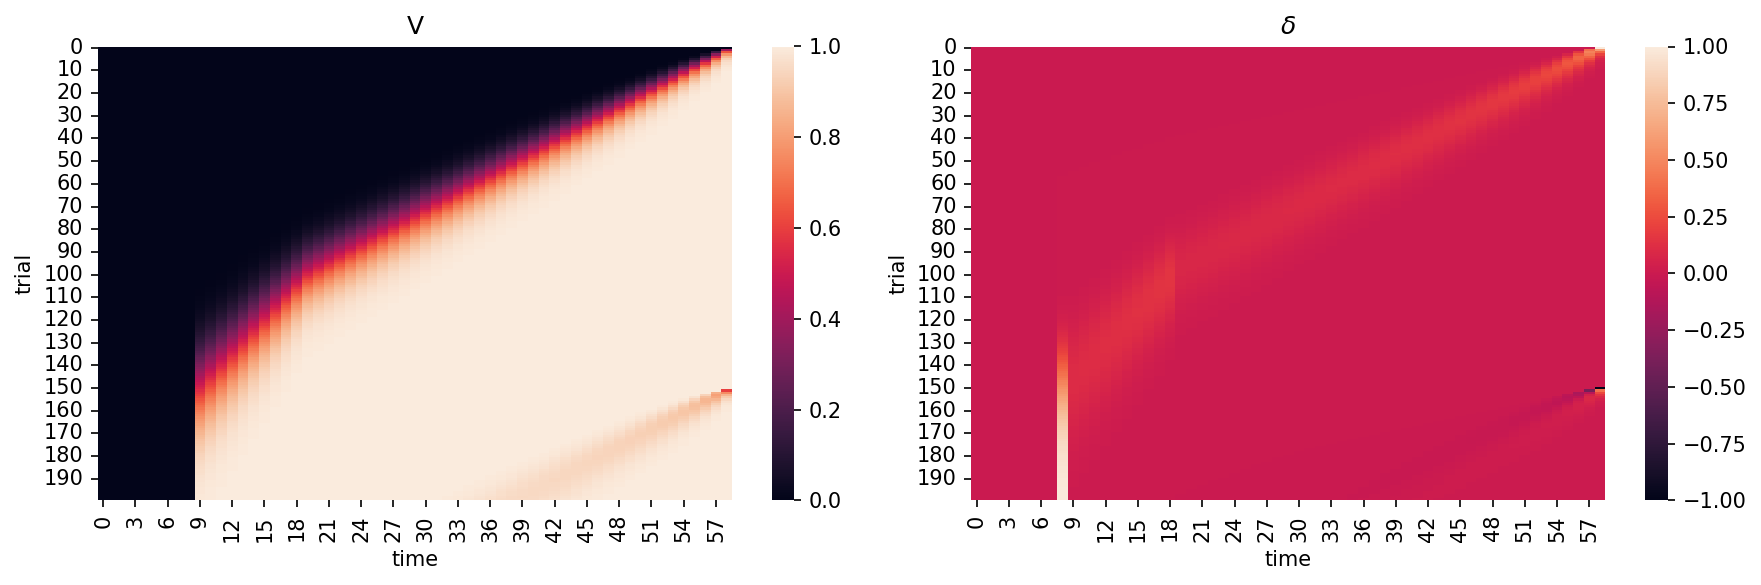

In [938]:
fig = plt.figure(dpi = 150, figsize=(12,4))
plt.subplot(1,2,1)
sns.heatmap(v[:,:-1])
plt.xlabel('time')
plt.ylabel('trial')
plt.title('V')
plt.subplot(1,2,2)
sns.heatmap(delta[:,:-1])
plt.xlabel('time')
plt.ylabel('trial')
plt.title('$\delta$')
plt.tight_layout()

In [939]:
# setup the figure and axes
def plot_3d_bar(top):
    fig = plt.figure(figsize=(16, 8))
    ax1 = fig.add_subplot(projection='3d')


    # fake data
    x1, y1 = top.shape
    x2, y2 = np.arange(x1), np.arange(y1)
    x3, y3 = np.meshgrid(x2, y2)
    x, y = x3.ravel(), y3.ravel()
    top_ = top.ravel() 
    
    bottom = np.zeros_like(top_)
    width = depth = 1
    ax1.bar3d(x, y, bottom, width, depth, top_, shade=False)
    plt.show()

In [940]:
def plot_3d_surface(top):
    fig = plt.figure(figsize=(6,6), dpi=120)
    ax = fig.add_subplot(projection='3d')
    # ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
    #                 cmap='viridis', edgecolor='none')
    # ax.set_title('surface');

    x1, y1 = top.shape
    x2, y2 = np.arange(x1), np.arange(y1)
    x3, y3 = np.meshgrid(x2, y2)

    ax = plt.axes(projection='3d')
    ax.plot_surface(x3.T,y3.T,top, rstride=1, cstride=1,
                    cmap='viridis', edgecolor='none')

#     ax.set_zlabel('V');


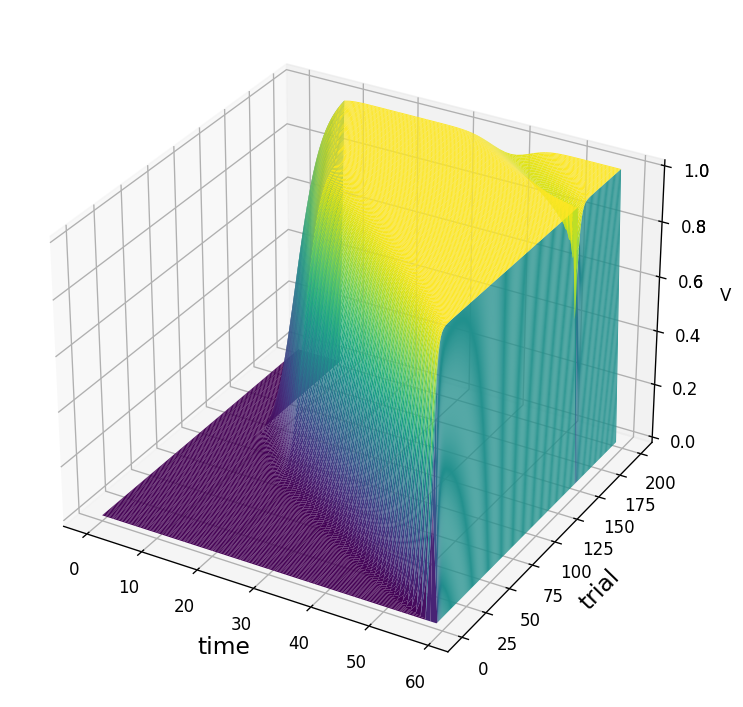

In [941]:
plot_3d_surface(v.T)
ax = plt.gca()
ax.set_xlabel('time', fontsize=14)
ax.set_ylabel('trial', fontsize=14)
ax.set_zlabel('V');
angle = -60
ax.view_init(30, angle)
plt.tight_layout()
plt.draw()

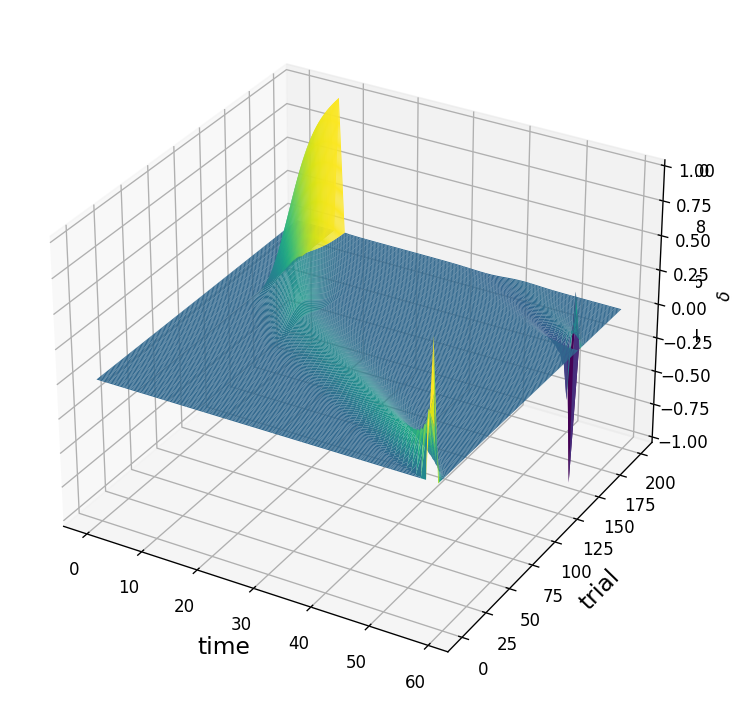

In [942]:
plot_3d_surface(delta.T)
ax = plt.gca()
ax.set_xlabel('time', fontsize=14)
ax.set_ylabel('trial', fontsize=14)
ax.set_zlabel('$\delta$', fontsize=10)
# ax.set_zticks([])
angle = -60
ax.view_init(30, angle)
plt.tight_layout()
plt.draw();

# Overshadowing

In [943]:
n_trials = 30
t_final = 30
lr1 = 0.3
lr2 = 0.1
gamma = 1
v = np.zeros((n_trials, t_final))
v_next = np.zeros((n_trials, t_final))
delta = np.zeros((n_trials, t_final))

# stimulus 1
u1 = np.zeros(t_final)
u1[9] = 1;
w1 = np.zeros(t_final)

# stimulus 2
u2 = np.zeros(t_final)
u2[9] = 1
w2 = np.zeros(t_final)

# reward
r = np.zeros(t_final)
r[-2] = 1

# learning:
for trial in range(n_trials):
    # run trial
    for t in range(1,t_final-1):

        #### v3 ####
        # calculate v(t)
        tau = 0
        while t-tau>0:
            v[trial, t] += w1[tau]*u1[t-tau] + w2[tau]*u2[t-tau]
            tau +=1

        # calculate v_next(t)
        tau = 0
        while t+1-tau>0:
            v_next[trial, t] += w1[tau]*u1[t+1-tau] +  w2[tau]*u2[t+1-tau]
            tau += 1
            
            
        delta[trial, t] = r[t] + gamma*v_next[trial, t] - v[trial, t]

    # update weights
#     for t in range(1,t_final-1):
        tau = 0
        while t-tau>0:
            w1[tau] += lr1*delta[trial, t]*u1[t-tau];
            w2[tau] += lr2*delta[trial, t]*u2[t-tau];
            tau += 1;

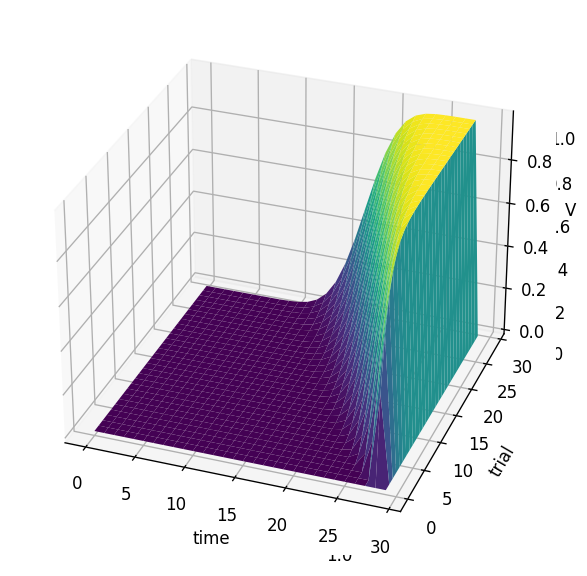

In [944]:
plot_3d_surface(v.T)
ax = plt.gca()
ax.set_xlabel('time')
ax.set_ylabel('trial')
ax.set_zlabel('V');
angle = -70
ax.view_init(30, angle)
plt.draw()

In [945]:
v1 = np.zeros(t_final)
v1_next = np.zeros(t_final)
delta1 = np.zeros(t_final)
v2 = np.zeros(t_final)
v2_next = np.zeros(t_final)
delta2 = np.zeros(t_final)

for t in range(1,t_final-1):

    #### v3 ####
    # calculate v(t)
    tau = 0
    while t-tau>0:
        v1[t] += w1[tau]*u1[t-tau]
        v2[t] += w2[tau]*u2[t-tau]
        tau +=1

    # calculate v_next(t)
    tau = 0
    while t+1-tau>0:
        v1[t] += w1[tau]*u1[t+1-tau]
        v2[t] += w2[tau]*u2[t+1-tau]
        tau += 1


    delta1[t] = r[t] + gamma*v1_next[t] - v1[t]    
    delta2[t] = r[t] + gamma*v2_next[t] - v2[t]

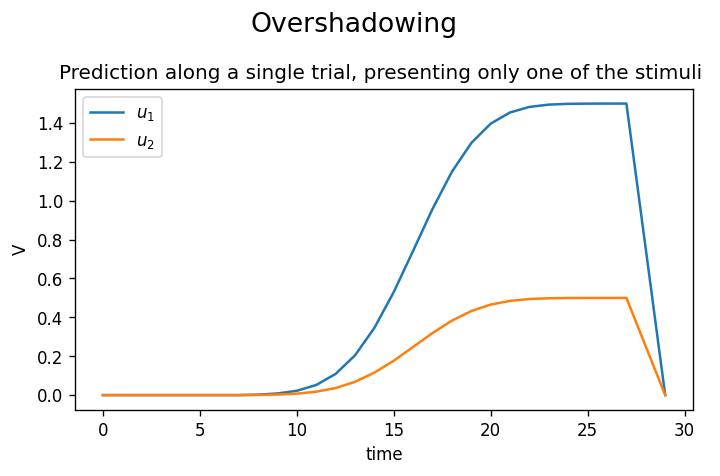

In [946]:
plt.figure(dpi=120)
plt.plot(v1)
plt.plot(v2)
plt.legend(('$u_1$','$u_2$'))
plt.title('Prediction along a single trial, presenting only one of the stimuli ')
plt.suptitle('Overshadowing', fontsize=16)
plt.xlabel('time')
plt.ylabel('V')
plt.tight_layout()

# Blocking

In [780]:
n_trials = 100
t_final = 30
lr1 = 0.4
lr2 = 0.4
gamma = 1
v = np.zeros((n_trials, t_final))
v_next = np.zeros((n_trials, t_final))
delta = np.zeros((n_trials, t_final))

# stimulus 1
u1 = np.zeros(t_final)
u1[9] = 1;
w1 = np.zeros(t_final)

# stimulus 2
u2 = np.zeros(t_final)
u2[9] = 1
w2 = np.zeros(t_final)

# reward
r = np.zeros(t_final)
r[-2] = 1

# learning:
for trial in range(n_trials):
    # run trial
    for t in range(1,t_final-1):

        #### v3 ####
        # calculate v(t)
        tau = 0
        while t-tau>0:
            v[trial, t] += w1[tau]*u1[t-tau]
            if trial > n_trials/2:
                v[trial, t] += w2[tau]*u2[t-tau]
            tau +=1

        # calculate v_next(t)
        tau = 0
        while t+1-tau>0:
            v_next[trial, t] += w1[tau]*u1[t+1-tau] 
            if trial > n_trials/2:
                 v_next[trial, t] += w2[tau]*u2[t+1-tau]
            tau += 1
            
            
        delta[trial, t] = r[t] + gamma*v_next[trial, t] - v[trial, t]

    # update weights
#     for t in range(1,t_final-1):
        tau = 0
        while t-tau>0:
            w1[tau] += lr1*delta[trial, t]*u1[t-tau];
            if trial > n_trials/2:
                w2[tau] += lr2*delta[trial, t]*u2[t-tau];
            tau += 1;

In [781]:
v[50]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.55352362,
       0.66438674, 0.7631242 , 0.8439094 , 0.90449829, 0.94604497,
       0.97201164, 0.98674948, 0.99431231, 0.99780286, 0.9992427 ,
       0.99976948, 0.9999388 , 0.99998605, 0.99999733, 0.99999958,
       0.99999995, 1.        , 1.        , 1.        , 0.        ])

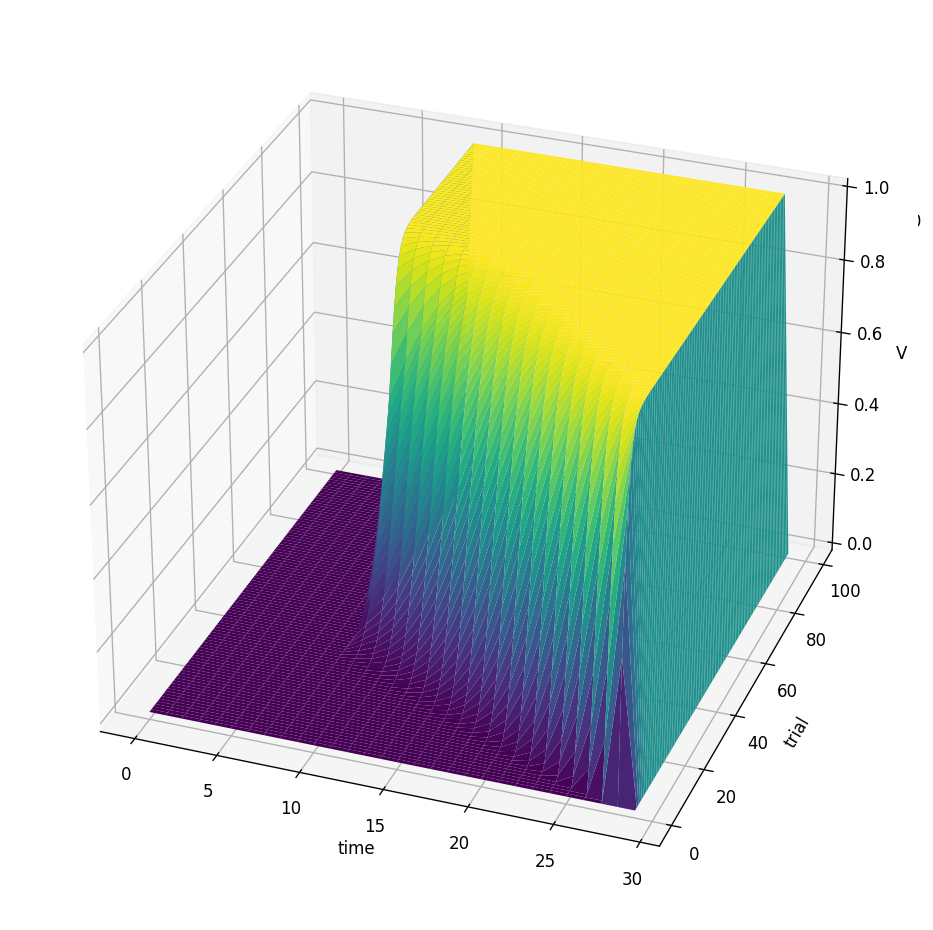

In [782]:
plot_3d_surface(v.T)
ax = plt.gca()
ax.set_xlabel('time')
ax.set_ylabel('trial')
ax.set_zlabel('V');
angle = -70
ax.view_init(30, angle)
plt.draw()

In [783]:
v1 = np.zeros(t_final)
v1_next = np.zeros(t_final)
delta1 = np.zeros(t_final)
v2 = np.zeros(t_final)
v2_next = np.zeros(t_final)
delta2 = np.zeros(t_final)

for t in range(1,t_final-1):

    #### v3 ####
    # calculate v(t)
    tau = 0
    while t-tau>0:
        v1[t] += w1[tau]*u1[t-tau]
        v2[t] += w2[tau]*u2[t-tau]
        tau +=1

    # calculate v_next(t)
    tau = 0
    while t+1-tau>0:
        v1[t] += w1[tau]*u1[t+1-tau]
        v2[t] += w2[tau]*u2[t+1-tau]
        tau += 1


    delta1[t] = r[t] + gamma*v1_next[t] - v1[t]    
    delta2[t] = r[t] + gamma*v2_next[t] - v2[t]

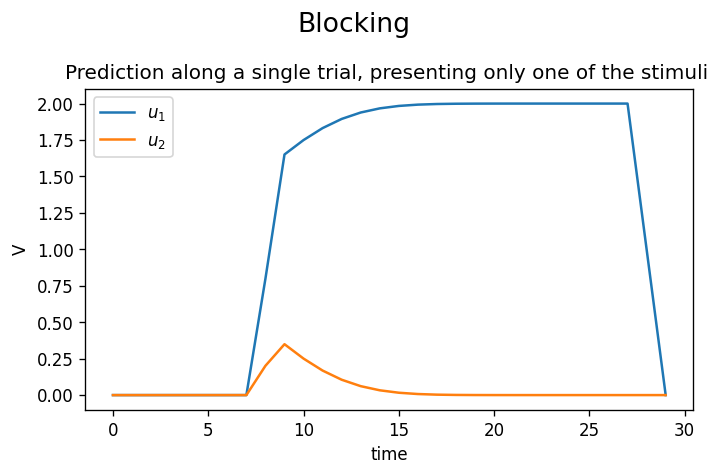

In [785]:
plt.figure(dpi=120)
plt.plot(v1)
plt.plot(v2)
plt.legend(('$u_1$','$u_2$'))
plt.title('Prediction along a single trial, presenting only one of the stimuli ')
plt.suptitle('Blocking', fontsize=16)
plt.xlabel('time')
plt.ylabel('V')
plt.tight_layout()

### Secondary conditioning

In [982]:
n_trials = 150
t_final = 60
lr = 0.3
gamma = 1
v = np.zeros((n_trials, t_final))
v_next = np.zeros((n_trials, t_final))
delta = np.zeros((n_trials, t_final))
tt = 0.5*n_trials

# stimulus 1
u1 = np.zeros(t_final)
u1[10] = 1;
w1 = np.zeros(t_final)

# stimulus 2
u2 = np.zeros(t_final)
u2[20] = 1
w2 = np.zeros(t_final)

# reward
r = np.zeros(t_final)
r[-2] = 1

# learning:
for trial in range(n_trials):
    # run trial
    for t in range(1,t_final-1):

        #### v3 ####
        # calculate v(t)
        tau = 0
        while t-tau>0:
            if trial < tt:
                v[trial, t] += w2[tau]*u2[t-tau]
            else:
                v[trial, t] += w1[tau]*u1[t-tau] + w2[tau]*u2[t-tau]
            tau +=1

        # calculate v_next(t)
        tau = 0
        while t+1-tau>0:
            if trial < tt:
                v_next[trial, t] +=  w2[tau]*u2[t+1-tau]
            else:
                v_next[trial, t] += w1[tau]*u1[t+1-tau] +  w2[tau]*u2[t+1-tau]
            tau += 1
            
        if trial < tt:
            delta[trial, t] = r[t] + gamma*v_next[trial, t] - v[trial, t]
        else:
            delta[trial, t] =  gamma*v_next[trial, t] - v[trial, t]

    # update weights
        tau = 0
        while t-tau>0:
            if trial < tt:
                w1[tau] += lr*delta[trial, t]*u1[t-tau];
            w2[tau] += lr*delta[trial, t]*u2[t-tau];
            tau += 1;


In [983]:
v1 = np.zeros(t_final)
v1_next = np.zeros(t_final)
delta1 = np.zeros(t_final)
v2 = np.zeros(t_final)
v2_next = np.zeros(t_final)
delta2 = np.zeros(t_final)

for t in range(1,t_final-1):

    #### v3 ####
    # calculate v(t)
    tau = 0
    while t-tau>0:
        v1[t] += w1[tau]*u1[t-tau]
        v2[t] += w2[tau]*u2[t-tau]
        tau +=1

    # calculate v_next(t)
    tau = 0
    while t+1-tau>0:
        v1[t] += w1[tau]*u1[t+1-tau]
        v2[t] += w2[tau]*u2[t+1-tau]
        tau += 1


    delta1[t] = gamma*v1_next[t] - v1[t]    
    delta2[t] = gamma*v2_next[t] - v2[t]

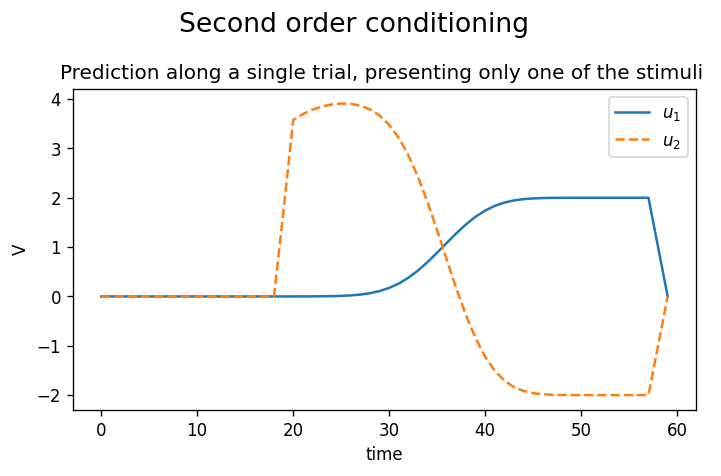

In [984]:
plt.figure(dpi=120)
plt.plot(v1)
plt.plot(v2, '--')
plt.legend(('$u_1$','$u_2$'))
plt.title('Prediction along a single trial, presenting only one of the stimuli ')
plt.suptitle('Second order conditioning', fontsize=16)
plt.xlabel('time')
plt.ylabel('V')
plt.tight_layout()